# Task 1: Theory Questions 

In [1]:
# Q-1). What is the core assumption of Naive Bayes? 
# Naive Bayes assumes that all features (like words or numbers) are independent of each other when we know the class (like spam or not spam).
# This is a simplifying assumption to make calculations easier.

# Q-2). Differentiate between GaussianNB, MultinomialNB, and BernoulliNB.
# GaussianNB: Used when features are numbers (like height, weight) and we assume they follow a normal (bell-curve) distribution.
# MultinomialNB: Best for count data, like how many times each word appears in a message.
# BernoulliNB: Works with yes/no or 0/1 data — like whether a word is present or not in a message

# Q-3). Why is Naive Bayes considered suitable for high-dimensional data? 
# Naive Bayes is fast and works well even when there are lots of features (like thousands of words), 
# because it treats each feature separately and doesn’t need complicated math to train.

# Task 2: Spam Detection using MultinomialNB

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix


url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
df = pd.read_csv(url, sep='\t', header=None, names=['label', 'text'])


df['label'] = df['label'].map({'ham': 0, 'spam': 1})


vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['text'])
Y = df['label']


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


model = MultinomialNB()
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("Precision:", precision_score(Y_test, Y_pred))
print("Recall:", recall_score(Y_test, Y_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))


Accuracy: 0.9617224880382775
Precision: 1.0
Recall: 0.7142857142857143
Confusion Matrix:
 [[1448    0]
 [  64  160]]


# Task 3: GaussianNB with Iris or Wine Dataset 

In [3]:
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression


data = load_iris()
X, Y = data.data, data.target


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)


gnb = GaussianNB()
gnb.fit(X_train, Y_train)
nb_pred = gnb.predict(X_test)


lr = LogisticRegression(max_iter=200)
lr.fit(X_train, Y_train)
lr_pred = lr.predict(X_test)


print("GaussianNB Accuracy:", accuracy_score(Y_test, nb_pred))
print("Logistic Regression Accuracy:", accuracy_score(Y_test, lr_pred))


GaussianNB Accuracy: 0.9
Logistic Regression Accuracy: 0.9333333333333333


# Task 4: Conceptual Questions

In [4]:
# Q-1)What is entropy and information gain?
# Entropy tells us how mixed or uncertain the data is.
# Information gain shows how much cleaner or more organized the data becomes after we split it based on a feature.

# Q-2)Difference between Gini Index and Entropy
# Entropy uses math with logarithms to measure how pure the data is.
# Gini Index is another way to measure impurity, but it's quicker to calculate. Both are used to decide how to split the data in a tree.

# Q-3)How can a decision tree overfit? How can this be avoided?
# A decision tree can overfit when it becomes too deep or complex, learning even the noise in the training data.
# To avoid this, we can:
# Limit the tree's depth (max_depth)
# Set a minimum number of samples to split a node (min_samples_split)
# Prune the tree to remove unnecessary branches

# Task 5: Decision Tree on Titanic Dataset

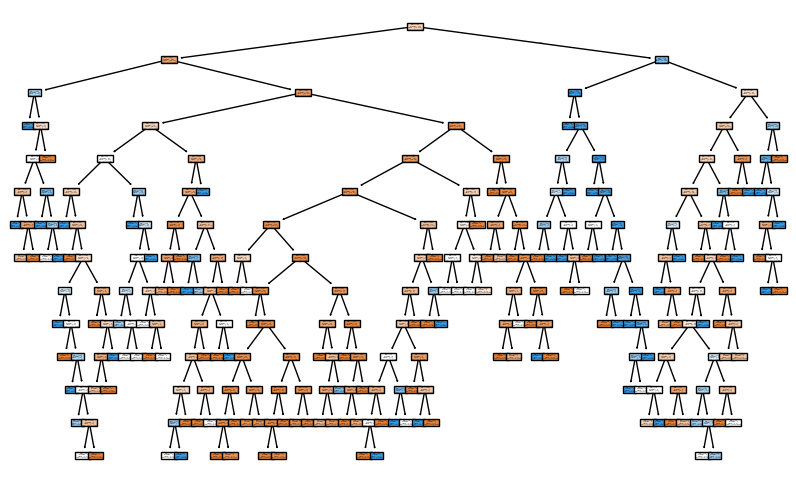

Accuracy: 0.8391608391608392
Confusion Matrix:
 [[72 10]
 [13 48]]


In [5]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt


data = sns.load_dataset("titanic")


data = data.dropna(subset=['age', 'embarked'])


data['sex'] = data['sex'].map({'male': 0, 'female': 1})
data['embarked'] = data['embarked'].map({'S': 0, 'C': 1, 'Q': 2})


X = data[['pclass', 'age', 'sex', 'embarked']]
Y = data['survived']


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)


model = DecisionTreeClassifier()
model.fit(X_train, Y_train)


plt.figure(figsize=(10, 6))
plot_tree(model, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()


Y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))


# Task 6: Model Tuning

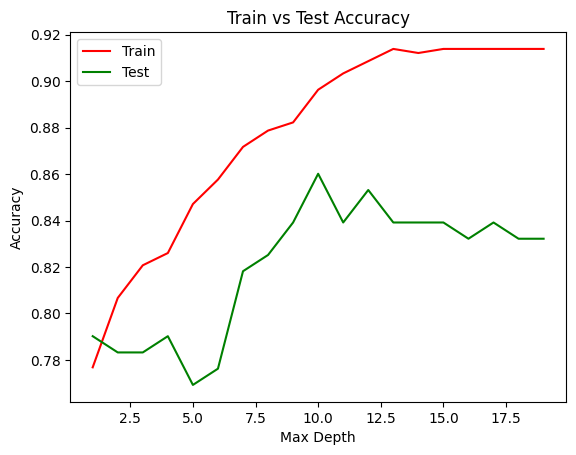

In [6]:
train_acc = []
test_acc = []

for depth in range(1, 20):
    clf = DecisionTreeClassifier(max_depth=depth)
    clf.fit(X_train, Y_train)
    train_acc.append(clf.score(X_train, Y_train))
    test_acc.append(clf.score(X_test, Y_test))

plt.plot(range(1, 20), train_acc, label='Train',color='red')
plt.plot(range(1, 20), test_acc, label='Test',color='green')
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Train vs Test Accuracy")
plt.show()

# Task 7: Conceptual Questions 

In [7]:

# Q-1)What is the difference between Bagging and Boosting? 
# Bagging builds many models at the same time using different parts of the data. It helps to reduce random errors.
# Boosting builds models one after another, where each new model tries to fix the mistakes made by the previous ones.

# Q-2) How does Random Forest reduce variance?
# Random Forest creates many decision trees using different data samples and combines their results.
# This makes the final prediction more stable and less likely to overfit.

# Q-3) Weakness of Boosting-based methods
# Boosting focuses a lot on fixing mistakes, so it can pay too much attention to noisy or wrong data.
# This can make the model overfit or perform badly on new data.

# Task 8: Random Forest vs Decision Tree 

Random Forest Accuracy: 0.8181818181818182
Precision: 0.7868852459016393
Recall: 0.7868852459016393


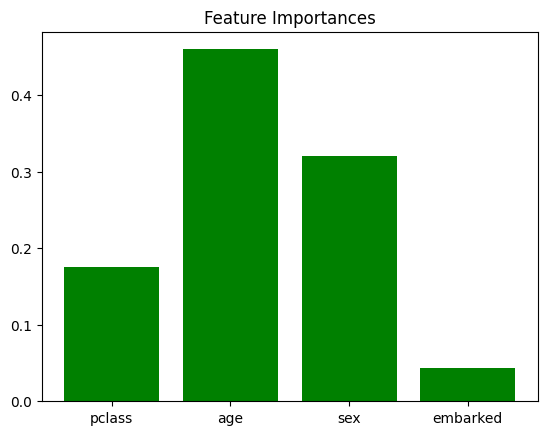

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score

rf = RandomForestClassifier()
rf.fit(X_train, Y_train)
rf_pred = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(Y_test, rf_pred))
print("Precision:", precision_score(Y_test, rf_pred))
print("Recall:", recall_score(Y_test, rf_pred))


importances = rf.feature_importances_
plt.bar(X.columns, importances,color='green')
plt.title("Feature Importances")
plt.show()


# Task 9: AdaBoost or Gradient Boosting

In [9]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import f1_score
import time


start = time.time()
ada = AdaBoostClassifier()
ada.fit(X_train, Y_train)
ada_pred = ada.predict(X_test)
print("AdaBoost Accuracy:", accuracy_score(Y_test, ada_pred))
print("F1 Score:", f1_score(Y_test, ada_pred))
print("Training Time:", time.time() - start)


start = time.time()
gb = GradientBoostingClassifier()
gb.fit(X_train, Y_train)
gb_pred = gb.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(Y_test, gb_pred))
print("F1 Score:", f1_score(Y_test, gb_pred))
print("Training Time:", time.time() - start)


C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Accuracy: 0.8181818181818182
F1 Score: 0.7833333333333333
Training Time: 0.25124120712280273
Gradient Boosting Accuracy: 0.8041958041958042
F1 Score: 0.7543859649122807
Training Time: 0.4824995994567871
